Epoch 1/20
8/8 [==============================] - 1s 70ms/step - loss: 1.1205 - accuracy: 0.3583 - val_loss: 1.0763 - val_accuracy: 0.4167
Epoch 2/20
8/8 [==============================] - 0s 53ms/step - loss: 1.1558 - accuracy: 0.5458 - val_loss: 0.9620 - val_accuracy: 0.4833
Epoch 3/20
8/8 [==============================] - 0s 53ms/step - loss: 1.0000 - accuracy: 0.4875 - val_loss: 1.0642 - val_accuracy: 0.3333
Epoch 4/20
8/8 [==============================] - 0s 53ms/step - loss: 1.1057 - accuracy: 0.5875 - val_loss: 1.1105 - val_accuracy: 0.3333
Epoch 5/20
8/8 [==============================] - 0s 54ms/step - loss: 0.8854 - accuracy: 0.5958 - val_loss: 0.8669 - val_accuracy: 0.7000
Epoch 6/20
8/8 [==============================] - 0s 55ms/step - loss: 0.8015 - accuracy: 0.7083 - val_loss: 0.7789 - val_accuracy: 0.7333
Epoch 7/20
8/8 [==============================] - 0s 54ms/step - loss: 0.6476 - accuracy: 0.7583 - val_loss: 1.6798 - val_accuracy: 0.4667
Epoch 8/20
8/8 [===========

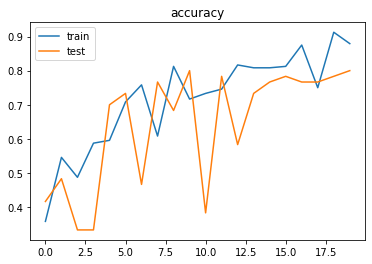

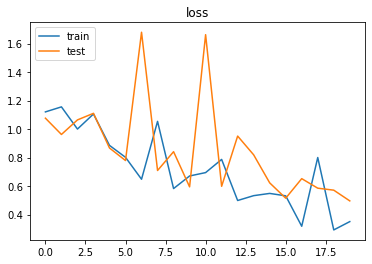

In [1]:
import cnn_model
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.model_selection import train_test_split

data = np.load('./image/photos.npz')
in_he = 32
in_wi = 32
im_color = 3
in_sh = (in_he, in_wi, im_color)
x = data['x']
y = data['y']

x = x.reshape(-1, in_he, in_wi, im_color)
x = x.astype('float32') / 255
y = keras.utils.to_categorical(y.astype('int32'), im_color)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

model = cnn_model.model_co(in_sh, im_color)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率＝', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc="upper left")
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc="upper left")
plt.show()

model.save_weights('./image/photos-model-light.hdf5')